In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import plotly.express as px

In [274]:
from pandas import datetime

In [275]:
df = pd.read_excel('Broadway_Grosses.xlsx', index_col=0)

In [276]:
df.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2017-05-21,1984,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
2017-05-28,1984,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2017-06-04,1984,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
2017-06-11,1984,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
2017-06-18,1984,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0


In [277]:
df['show'] = df['show'].str.capitalize()

In [278]:
df.shape

(8210, 15)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8210 entries, 2017-05-21 to 2015-02-22
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show              8190 non-null   object 
 1   type              8210 non-null   object 
 2   theatre           8210 non-null   object 
 3   previews          8210 non-null   int64  
 4   performances      8210 non-null   int64  
 5   grosses           8210 non-null   int64  
 6   prev_week_gross   8210 non-null   object 
 7   GG%GP             8210 non-null   float64
 8   attend            8210 non-null   int64  
 9   prev_week_attend  7997 non-null   float64
 10  %cap              8210 non-null   float64
 11  close_month       8210 non-null   int64  
 12  genre             8210 non-null   object 
 13  tony_noms         8210 non-null   int64  
 14  tony_awards       8210 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.0+ MB


In [280]:
df.isna().sum()

show                 20
type                  0
theatre               0
previews              0
performances          0
grosses               0
prev_week_gross       0
GG%GP                 0
attend                0
prev_week_attend    213
%cap                  0
close_month           0
genre                 0
tony_noms             0
tony_awards           0
dtype: int64

In [281]:
df = df.dropna()

In [282]:
df.shape

(7978, 15)

In [283]:
df_hamilton = df[df.show.str.contains('Hamilton')==True]

In [284]:
df_hamilton.shape

(233, 15)

In [285]:
df_hamilton.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2015-07-26,Hamilton,Musical,Richard Rodgers,7,0,1302511,1288436,1.12,9290,9273.0,1.00,0,Drama,16,11
2015-08-02,Hamilton,Musical,Richard Rodgers,8,0,1490816,1302511,1.12,10619,9290.0,1.00,0,Drama,16,11
2015-08-09,Hamilton,Musical,Richard Rodgers,4,4,1255163,1490816,0.94,10638,10619.0,1.01,0,Drama,16,11
2015-08-16,Hamilton,Musical,Richard Rodgers,0,8,1459314,1255163,1.09,10706,10638.0,1.01,0,Drama,16,11
2015-08-23,Hamilton,Musical,Richard Rodgers,0,8,1456753,1459314,1.09,10708,10706.0,1.01,0,Drama,16,11


In [286]:
px.line(df_hamilton, x=df_hamilton.index, y='%cap')

In [287]:
px.line(df_hamilton, x=df_hamilton.index, y='grosses')

In [288]:
df_ts = df_hamilton[['grosses']]

In [289]:
df_ts.head()

,grosses
date,
2015-07-26,1302511
2015-08-02,1490816
2015-08-09,1255163
2015-08-16,1459314
2015-08-23,1456753


In [290]:
df_ts.shape

(233, 1)

In [291]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2015-07-26 to 2020-01-05
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   grosses  233 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


In [292]:
df_ts.index[0]

Timestamp('2015-07-26 00:00:00')

<AxesSubplot:xlabel='date'>

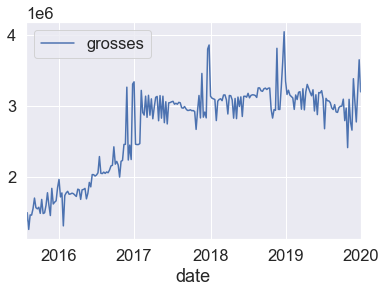

In [293]:
df_ts.plot()

In [294]:
## Stationarity
#mean, variance and covariance is constant over periods of time.

In [295]:
gross_diff = df_ts.diff(periods=1)

In [296]:
gross_diff = gross_diff[1:]
gross_diff.head()

,grosses
date,
2015-08-02,188305.0
2015-08-09,-235653.0
2015-08-16,204151.0
2015-08-23,-2561.0
2015-08-30,92175.0


In [297]:
from statsmodels.graphics.tsaplots import plot_acf

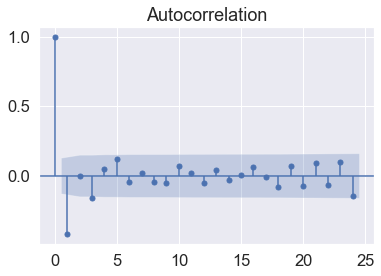

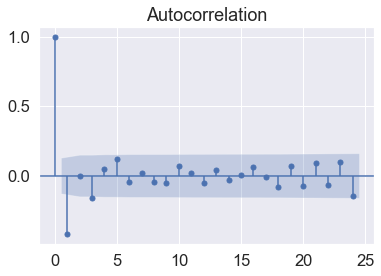

In [298]:
plot_acf(gross_diff)

In [299]:
## Creating Model

In [300]:
X = df_ts.values
train = X[0:200]
test = X[200:]

In [301]:
test.size

33

In [302]:
# ARIMA

In [303]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [304]:
import itertools
p=d=q=range(0,5)

pdq = list(itertools.product(p,d,q))

In [305]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=(param))
        output = model_arima.fit()
        print(param,output.aic) 
    except:
        continue

(0, 0, 0) 5920.681715091773
(0, 0, 1) 5778.647941174655
(0, 0, 2) 5671.268314226072
(0, 0, 3) 5648.281542494242
(0, 0, 4) 5634.0715864615495
(0, 1, 0) 5533.755428715955
(0, 1, 1) 5459.796940800242
(0, 1, 2) 5459.239527630684
(0, 1, 3) 5460.367496818557
(0, 1, 4) 5450.903591638115
(0, 2, 0) 5711.937406459015
(0, 2, 1) 5514.142427255633
(0, 2, 2) 5440.284783679075
(0, 2, 3) 5439.303952355819
(0, 2, 4) 5440.196928031998
(1, 0, 0) 5558.594134805337
(1, 0, 1) 5497.712335029914
(1, 0, 2) 5497.821824829161
(1, 0, 3) 5499.2813742887465
(1, 0, 4) 5488.373859787904
(1, 1, 0) 5499.354075959468
(1, 1, 1) 5459.153208038391
(1, 1, 2) 5461.134009272625
(1, 1, 3) 5459.224057287349
(1, 1, 4) 5452.805548199736
(1, 2, 0) 5604.371720144071
(1, 2, 4) 5439.004025295319
(2, 0, 0) 5529.12266162859
(2, 0, 1) 5497.794324278158
(2, 0, 2) 5499.76963522294
(2, 0, 3) 5498.161908279252
(2, 0, 4) 5490.207132265505
(2, 1, 0) 5495.303233606295
(2, 1, 1) 5461.067176715263
(2, 1, 2) 5462.05622713324
(2, 1, 3) 5449.883224

In [306]:
model_arima = ARIMA(train, order=(4,2,1))
output = model_arima.fit()

In [307]:
predictions = output.forecast(steps = 33)[0]
predictions

array([3233411.22418599, 3227662.15355028, 3193155.06751212,
       3183792.50042992, 3201368.65979555, 3209400.63649228,
       3206411.20577845, 3192885.64245121, 3187969.87982063,
       3190593.74049154, 3192923.9582489 , 3190299.08222856,
       3184176.0903271 , 3180193.0543733 , 3178803.46399852,
       3177766.42284564, 3174922.1584331 , 3170778.98374624,
       3167038.49627165, 3164168.3044545 , 3161464.32883879,
       3158121.75219152, 3154231.79299881, 3150334.10481404,
       3146670.38883807, 3143029.05495006, 3139125.60561087,
       3134953.3496547 , 3130685.94643651, 3126426.6196041 ,
       3122117.3237057 , 3117659.1277698 , 3113036.66565003])

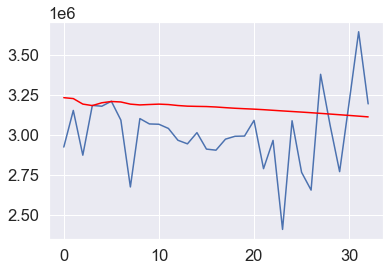

In [308]:
plt.plot(test)
plt.plot(predictions, color='red')

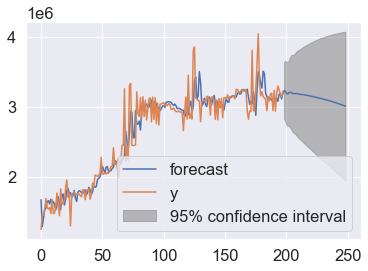

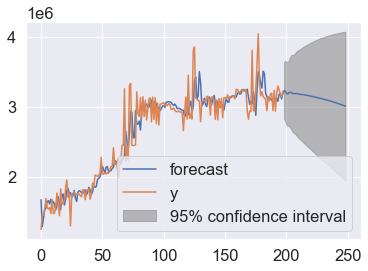

In [310]:
output.plot_predict(2, 250)
